In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('good_doctor_data.csv')

In [3]:
df.head()

,Unique_ID,# Pregnancies,Blood Chemestry~I,Blood Chemisty~II,Blood Chemisty~III,Blood Pressure,Skin Thickness,BMI,Genetic Predisposition Factor,Age,Air Qual'ty Index,$tate,Outcome
0,5642118.0,1.0,0.0,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5642119.0,1.0,0.0,0.0,61.0,68.0,35.0,32.0,0.389,22.0,10.0,CA,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5642120.0,1.0,0.0,0.0,172.0,48.0,20.0,24.7,0.140,22.0,77.0,CA,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unique_ID                      3840 non-null   float64
 1   # Pregnancies                  3840 non-null   float64
 2   Blood Chemestry~I              3815 non-null   float64
 3   Blood Chemisty~II              3830 non-null   float64
 4   Blood Chemisty~III             3840 non-null   float64
 5   Blood Pressure                 3840 non-null   float64
 6   Skin Thickness                 3835 non-null   float64
 7   BMI                            3840 non-null   float64
 8   Genetic Predisposition Factor  3840 non-null   float64
 9   Age                            3840 non-null   float64
 10  Air Qual'ty Index              3810 non-null   float64
 11  $tate                          3840 non-null   object 
 12  Outcome                        3840 non-null   f

In [5]:
df.columns

Index(['Unique_ID', '# Pregnancies', 'Blood Chemestry~I', 'Blood Chemisty~II',
       'Blood Chemisty~III', 'Blood Pressure', 'Skin Thickness', 'BMI',
       'Genetic Predisposition Factor', 'Age', 'Air Qual'ty Index', '$tate',
       'Outcome'],
      dtype='object')

Here we can see that column names have spelling mistakes and we can have a problem in the next steps, so let's change them.

In [6]:
df.rename(columns = {'# Pregnancies': 'Pregnancies', 
                     'Blood Chemestry~I': 'BloodChemistryI', 
                     'Blood Chemisty~II': 'BloodChemistryII',
                     'Blood Chemisty~III': 'BloodChemistryIII', 
                     'Blood Pressure': 'BloodPressure', 
                     'Skin Thickness': 'SkinThickness', 
                     'BMI': 'BMI',
                     'Genetic Predisposition Factor': 'GeneticPredispositionFactor', 
                     'Age': 'Age',
                     "Air Qual'ty Index": 'AirQualityIndex', 
                     '$tate': 'State',
                     'Outcome': 'Outcome'}, inplace = True)

In [7]:
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

This graph shows missing values and as we can see there is a lot of them and we have even empty rows.

<AxesSubplot: >

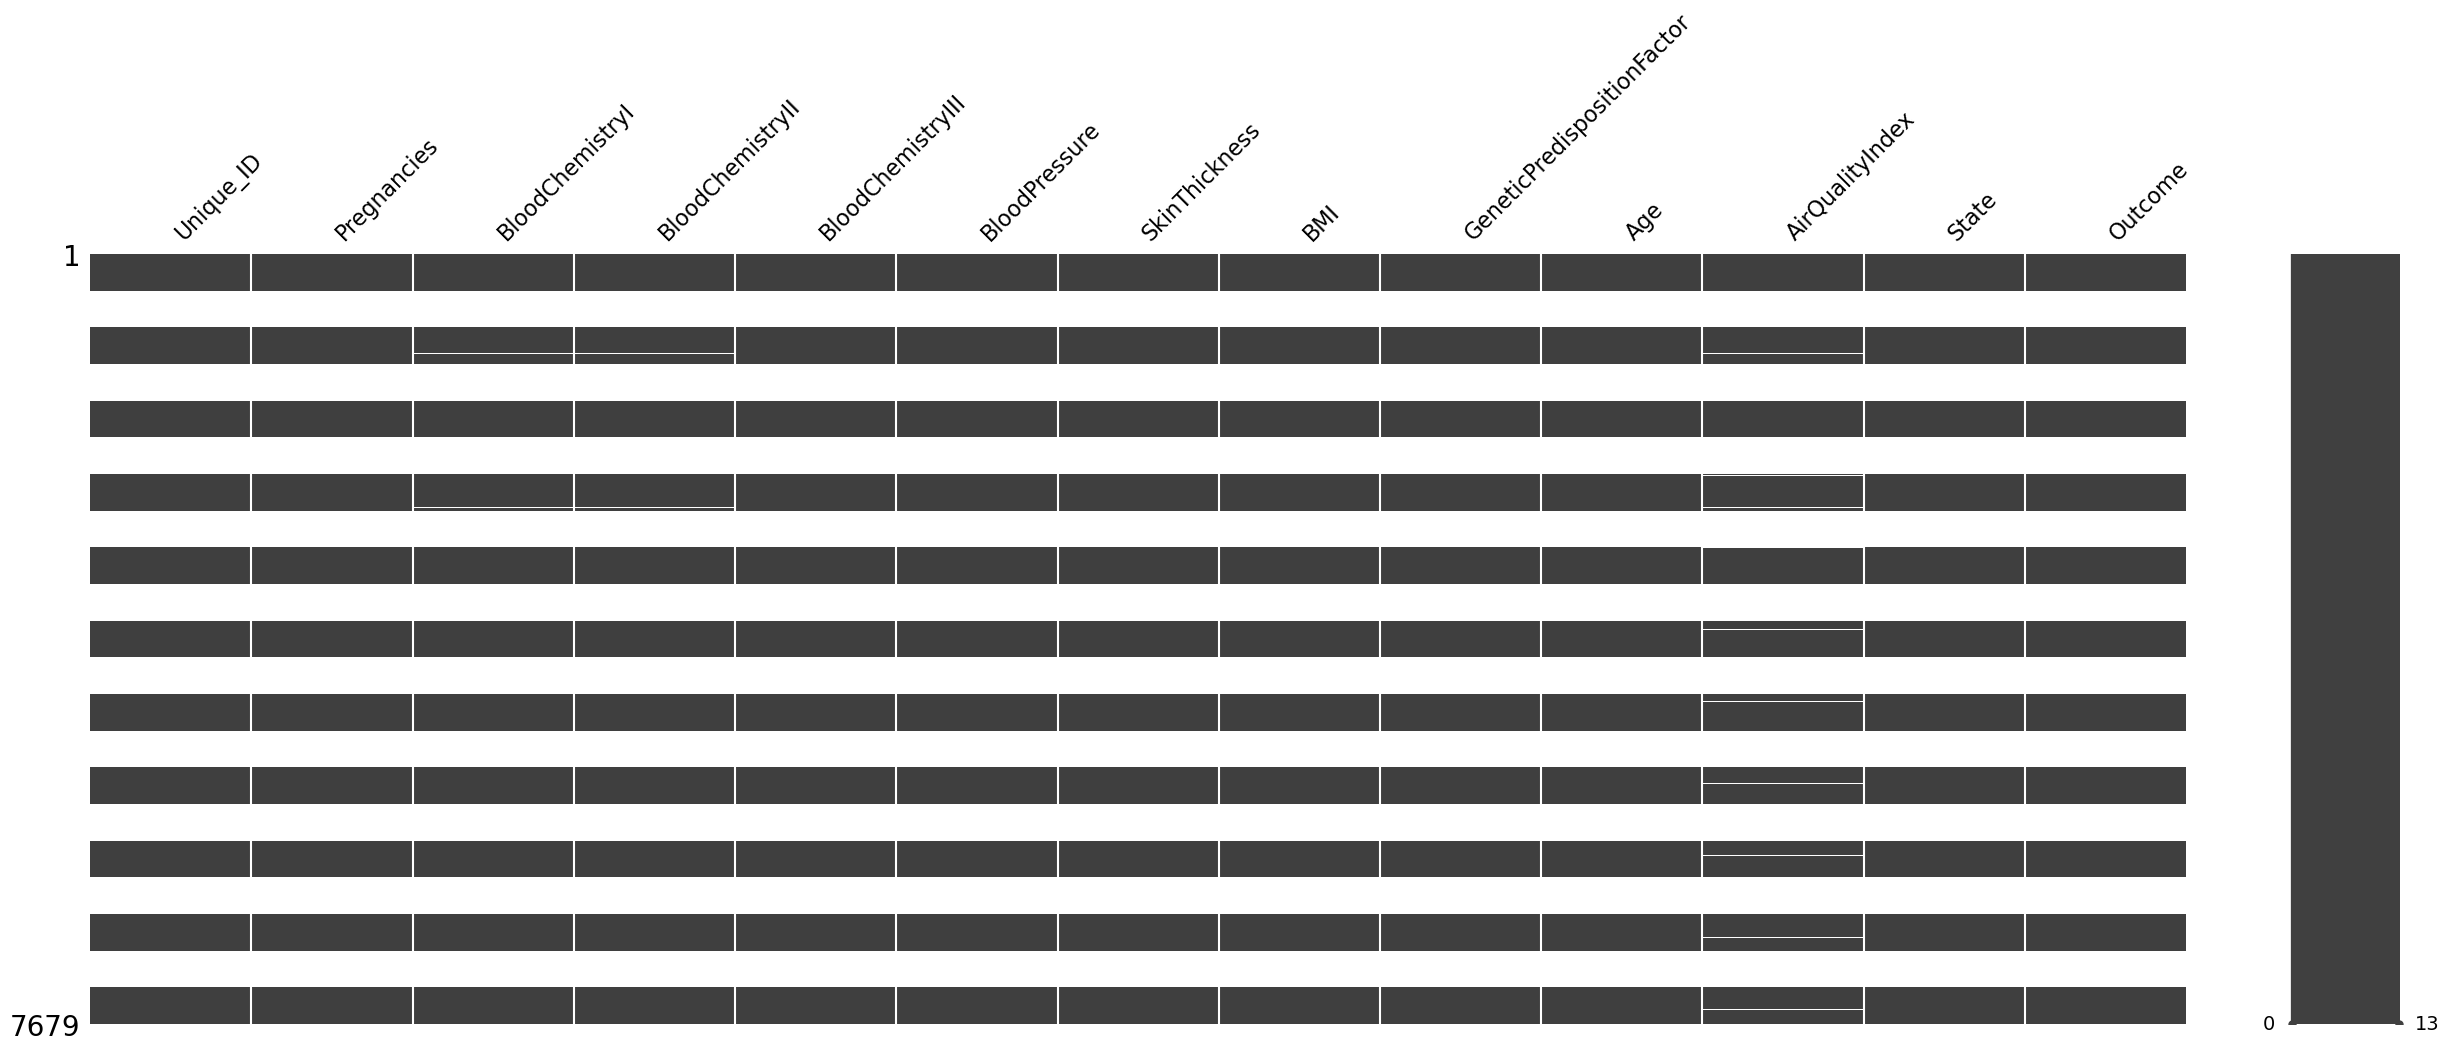

In [8]:
missingno.matrix(df, figsize = (30,10))

In [9]:
df[df.isna().all(axis = 1)]

,Unique_ID,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,State,Outcome
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


These rows are useless so we can delete them.

In [10]:
df.drop(df[df.isna().all(axis = 1)].index, inplace = True)

In [11]:
df

,Unique_ID,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,State,Outcome
0,5642118.0,1.0,0.0,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0.0
2,5642119.0,1.0,0.0,0.0,61.0,68.0,35.0,32.0,0.389,22.0,10.0,CA,0.0
4,5642120.0,1.0,0.0,0.0,172.0,48.0,20.0,24.7,0.140,22.0,77.0,CA,0.0
6,5642121.0,5.0,44.0,0.0,207.0,62.0,0.0,25.0,0.587,36.0,40.0,OR,0.0
8,5642122.0,2.0,56.0,45.0,150.0,56.0,28.0,24.2,0.332,22.0,70.0,CT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,5642881.0,2.0,197.0,543.0,101.0,70.0,45.0,30.5,0.158,53.0,53.0,PA,1.0
7672,5642882.0,2.0,197.0,0.0,2.0,70.0,99.0,34.7,0.575,62.0,0.0,TX,1.0
7674,5642883.0,0.0,198.0,274.0,304.0,66.0,32.0,41.3,0.502,28.0,52.0,NJ,1.0
7676,5642884.0,1.0,199.0,0.0,58.0,76.0,43.0,42.9,1.394,22.0,21.0,CA,1.0


In [12]:
df.drop_duplicates(inplace = True)

'Unique_ID' column is also usless because every value is diffrent, so delete that column.

In [13]:
df.drop(['Unique_ID'], axis = 1, inplace = True)

Let's use missing matrix again

<AxesSubplot: >

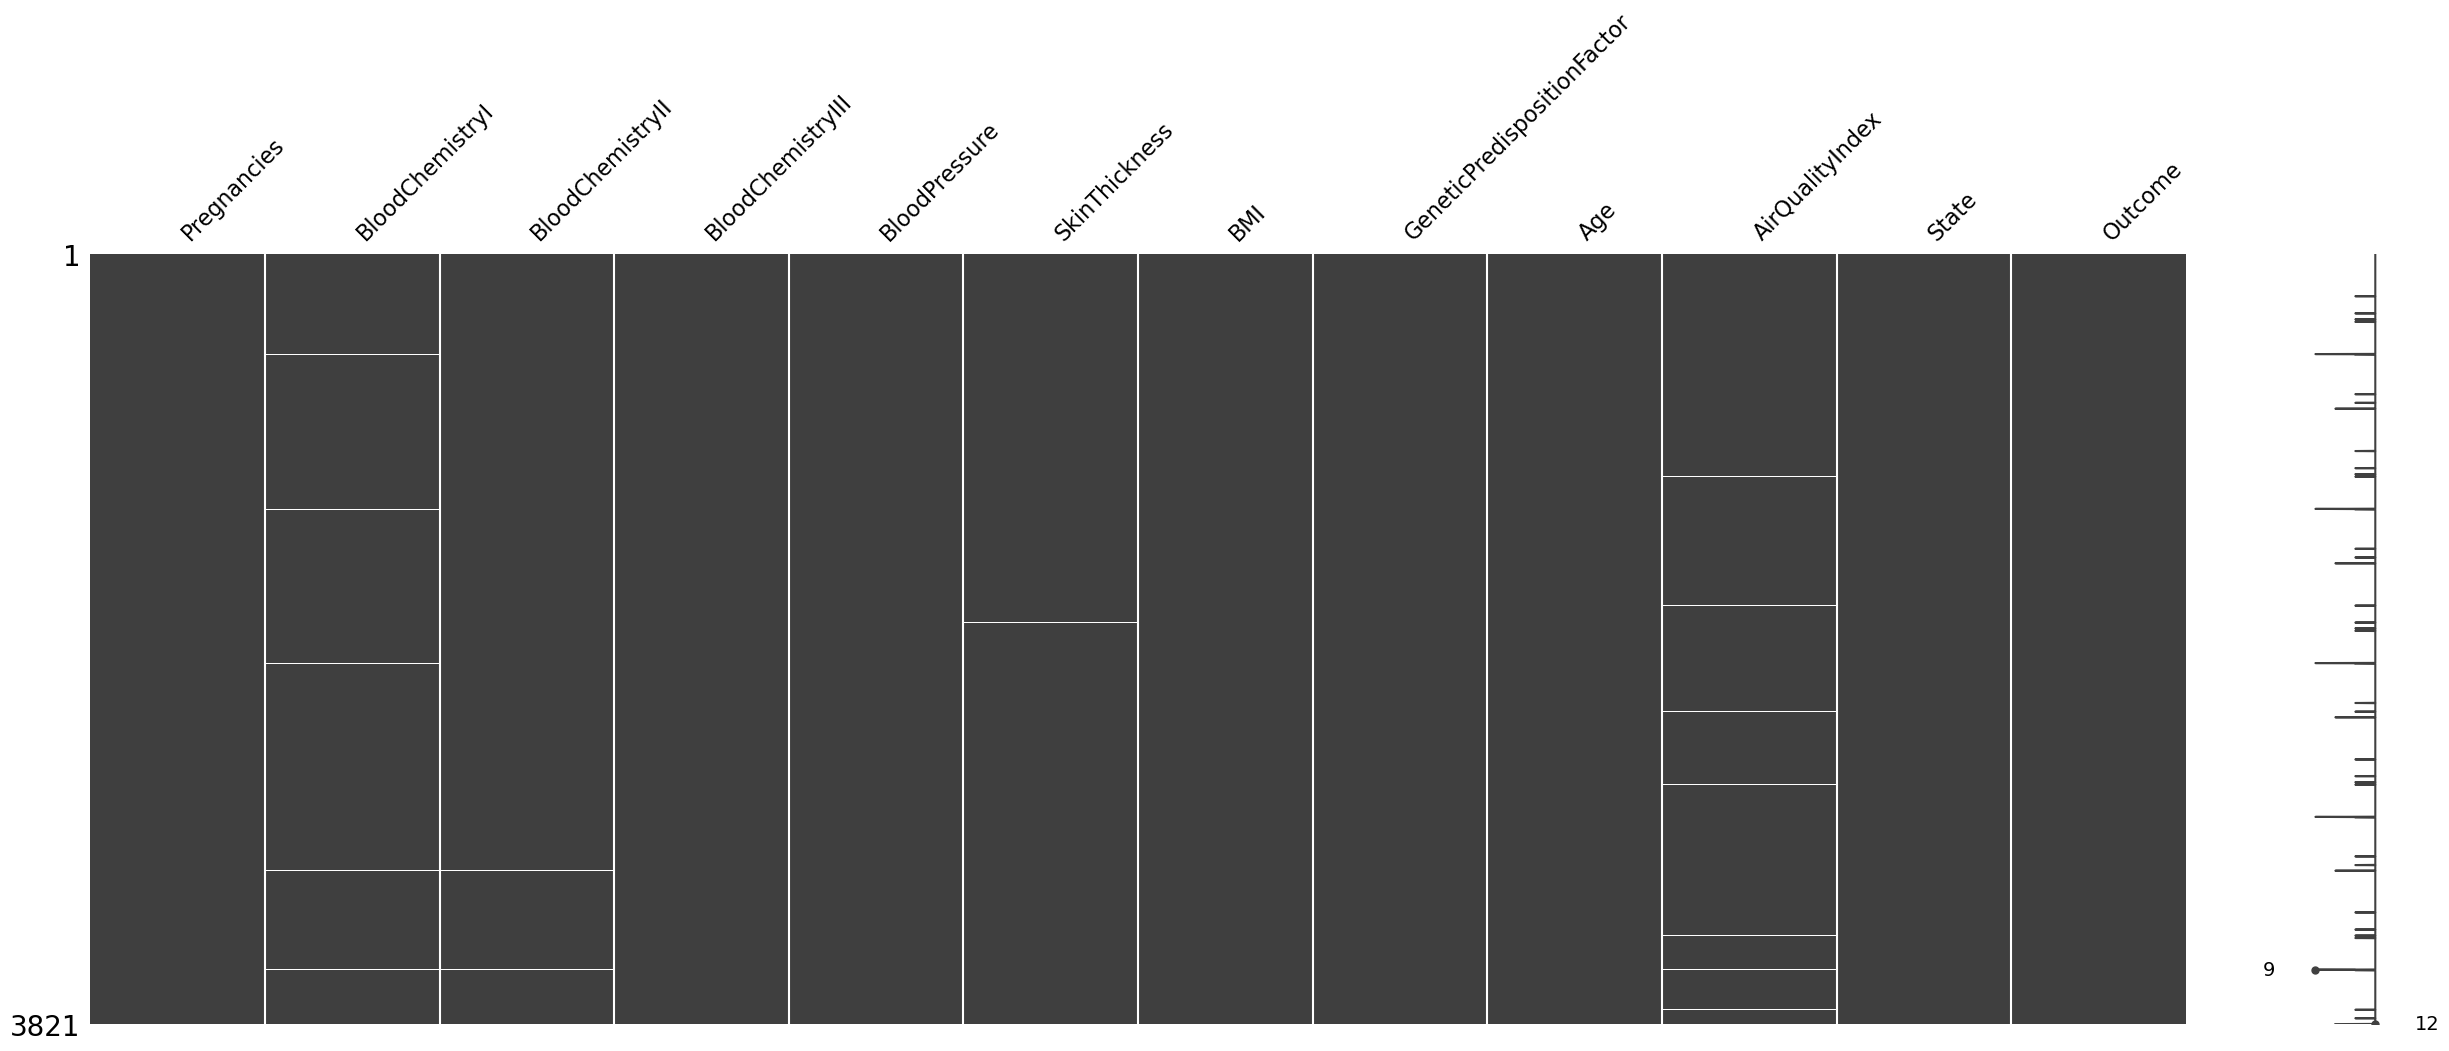

In [14]:
missingno.matrix(df, figsize = (30,10))

As we can see there is still missing values but not that many.

By runing 'df.isnull().sum()' command we will known exacly how many NaNs left in each column.

In [15]:
df.isnull().sum()

Pregnancies                     0
BloodChemistryI                25
BloodChemistryII               10
BloodChemistryIII               0
BloodPressure                   0
SkinThickness                   5
BMI                             0
GeneticPredispositionFactor     0
Age                             0
AirQualityIndex                30
State                           0
Outcome                         0
dtype: int64

In [16]:
len(df[df.isna().any(axis = 1)])

55

In [17]:
df[df.isna().any(axis = 1)].head()

,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,State,Outcome
418,1.0,103.0,82.0,265.0,80.0,11.0,19.4,0.491,22.0,NaN,CA,0.0
588,0.0,113.0,0.0,134.0,80.0,NaN,31.0,0.874,21.0,21.0,AL,0.0
648,0.0,117.0,0.0,238.0,0.0,0.0,33.8,0.932,44.0,NaN,WA,0.0
672,0.0,120.0,63.0,225.0,74.0,18.0,30.5,0.285,26.0,NaN,MA,0.0
992,2.0,NaN,NaN,77.0,70.0,27.0,36.8,0.340,27.0,NaN,MS,0.0


In [18]:
percent_of_nans = round(len(df[df.isna().any(axis = 1)])/len(df)*100, 2)
print(f'Percent of NaNs in dataframe: {percent_of_nans}%')

Percent of NaNs in dataframe: 1.44%


In [19]:
from pandas_profiling import ProfileReport

In [20]:
# report = ProfileReport(df)
# report.to_file('report.thml')

This class shows us a lot of usefull statistics.

In [21]:
correlation = df.corr()

Correlation matrix shows us correlation between features and it helps us to choose them wisely.

In [22]:
correlation

,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,Outcome
Pregnancies,1.000000,0.128014,-0.074953,-0.013174,0.140467,-0.081924,0.016333,-0.033799,0.448491,0.045542,0.220976
BloodChemistryI,0.128014,1.000000,0.333486,-0.011500,0.150733,0.061956,0.225893,0.137721,0.210644,-0.002214,0.469935
BloodChemistryII,-0.074953,0.333486,1.000000,0.003152,0.089278,0.437560,0.199971,0.183763,-0.036641,-0.044603,0.130205
BloodChemistryIII,-0.013174,-0.011500,0.003152,1.000000,-0.024258,-0.008531,0.014540,-0.005300,-0.016750,0.007524,-0.014112
BloodPressure,0.140467,0.150733,0.089278,-0.024258,1.000000,0.208744,0.280651,0.041714,0.199111,0.039677,0.063397
SkinThickness,-0.081924,0.061956,0.437560,-0.008531,0.208744,1.000000,0.393267,0.184873,-0.099583,0.009786,0.075117
BMI,0.016333,0.225893,0.199971,0.014540,0.280651,0.393267,1.000000,0.141743,-0.004551,0.005892,0.291945
GeneticPredispositionFactor,-0.033799,0.137721,0.183763,-0.005300,0.041714,0.184873,0.141743,1.000000,0.017979,0.010768,0.174559
Age,0.448491,0.210644,-0.036641,-0.016750,0.199111,-0.099583,-0.004551,0.017979,1.000000,-0.013355,0.188144
AirQualityIndex,0.045542,-0.002214,-0.044603,0.007524,0.039677,0.009786,0.005892,0.010768,-0.013355,1.000000,0.050833


Let's see correlation between independent features and Outcome

In [23]:
correlation['Outcome']

Pregnancies                    0.220976
BloodChemistryI                0.469935
BloodChemistryII               0.130205
BloodChemistryIII             -0.014112
BloodPressure                  0.063397
SkinThickness                  0.075117
BMI                            0.291945
GeneticPredispositionFactor    0.174559
Age                            0.188144
AirQualityIndex                0.050833
Outcome                        1.000000
Name: Outcome, dtype: float64

And plot the graph

In [24]:
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot: >

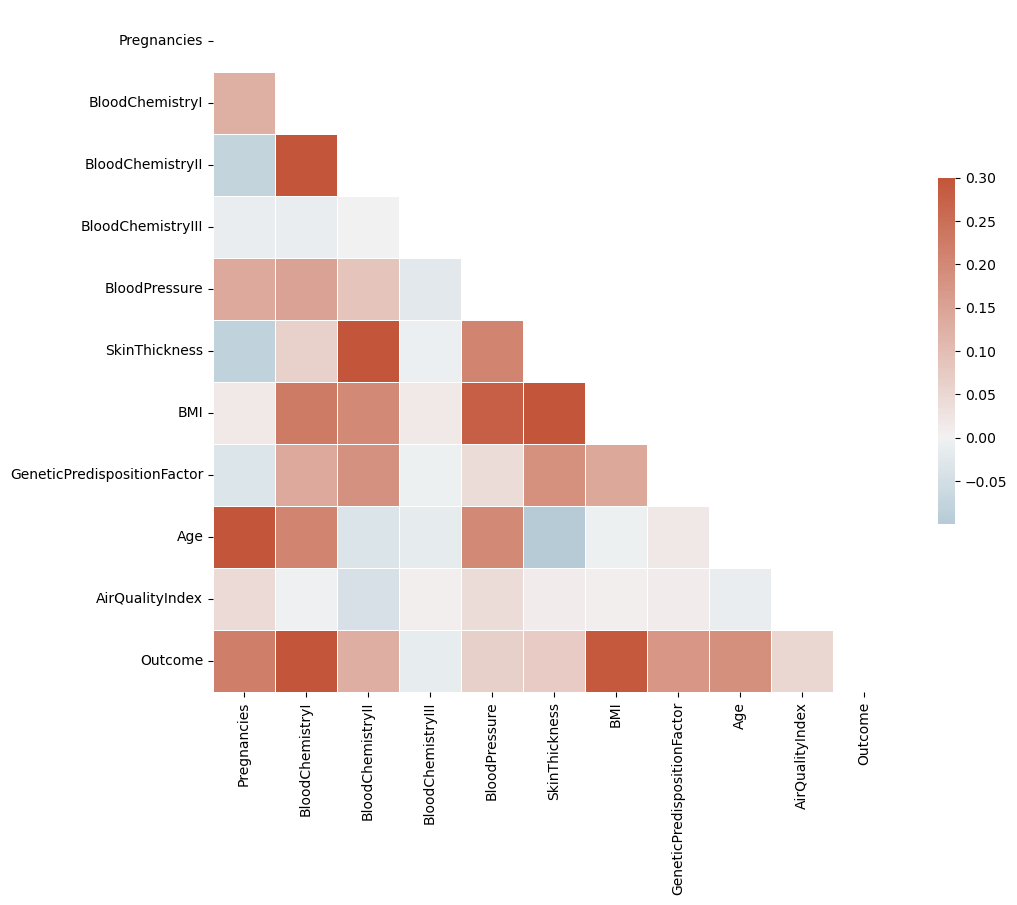

In [25]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Now we will take a look on each column separately

In [26]:
df['Outcome'] = df['Outcome'].astype(int)

In [27]:
df.head()

,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,State,Outcome
0,1.0,0.0,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0
2,1.0,0.0,0.0,61.0,68.0,35.0,32.0,0.389,22.0,10.0,CA,0
4,1.0,0.0,0.0,172.0,48.0,20.0,24.7,0.140,22.0,77.0,CA,0
6,5.0,44.0,0.0,207.0,62.0,0.0,25.0,0.587,36.0,40.0,OR,0
8,2.0,56.0,45.0,150.0,56.0,28.0,24.2,0.332,22.0,70.0,CT,0


On every graph below 0 means healthy and 1 means sick

<AxesSubplot: xlabel='Outcome', ylabel='count'>

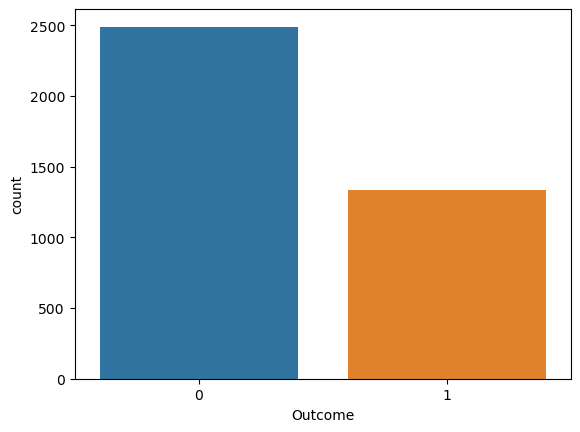

In [28]:
sns.countplot(x = 'Outcome', data = df)

As we see on graph our dataset is unbalance, we have more healthy than sick people. We have to remember
about it when we will split dataframe on train and test dataframes.

In [29]:
len(df[df['Outcome'] == 0])

2489

In [30]:
len(df[df['Outcome'] == 1])

1332

In [31]:
df['Pregnancies'].describe()

count    3821.000000
mean        3.846375
std         3.372154
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        17.000000
Name: Pregnancies, dtype: float64

In [32]:
df['Pregnancies'] = df['Pregnancies'].astype(int)

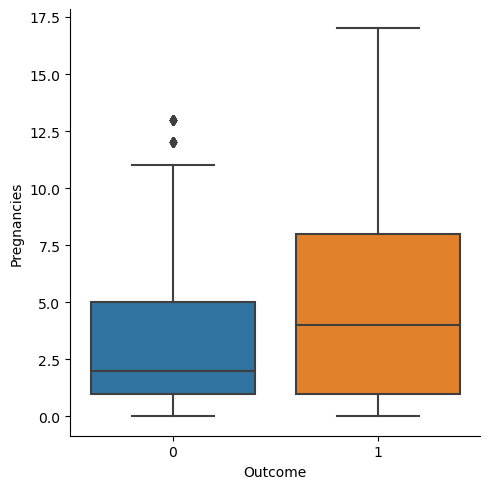

In [33]:
sns.catplot(x = 'Outcome', y = 'Pregnancies', kind = 'box', data = df)

On graph we see that if counts of pregnancies is bigger then it is more likely that someone is sick.

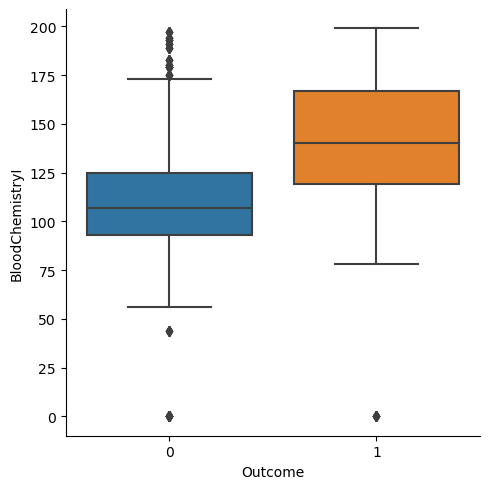

In [34]:
sns.catplot(x = 'Outcome', y = 'BloodChemistryI', kind = 'box', data = df)

On this graph we see that with the increment of BloodChemistryI then the likelihood of diseases also increases. We can be almost sure that if someone has BloodChemistryI bigger than 125 is sick.

In [35]:
df['BloodChemistryI'].describe()

count    3796.000000
mean      120.971022
std        31.881611
min         0.000000
25%        99.000000
50%       117.000000
75%       141.000000
max       199.000000
Name: BloodChemistryI, dtype: float64

In [36]:
len(df[df['BloodChemistryI'] == 0])

23

We have a few zeros in that columns, but it can also be a proper value. Because I'm not a doctor now 
I will assume that this is ok, but if I could I would ask doctor about that zeros values.

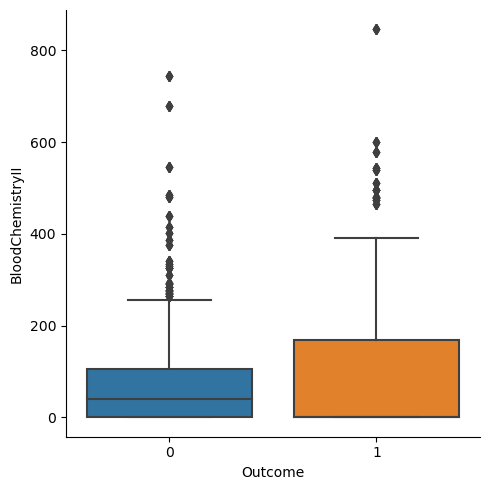

In [37]:
sns.catplot(x = 'Outcome', y = 'BloodChemistryII', kind = 'box', data = df)

In [38]:
len(df[df['BloodChemistryII'] == 0])

1855

In [39]:
df['BloodChemistryII'].describe()

count    3811.000000
mean       79.912097
std       115.400912
min         0.000000
25%         0.000000
50%        32.000000
75%       127.500000
max       846.000000
Name: BloodChemistryII, dtype: float64

In [40]:
percent_of_zeros = round(len(df[df['BloodChemistryII'] == 0])/len(df)*100, 2)
print(f'Percent of zeros in BloodChemistryII column: {percent_of_zeros}%')

Percent of zeros in BloodChemistryII column: 48.55%


As we see there is almost 50% of zeros in BloodChemistryII column, as I mentioned earlier it could be proper value and I would gladly discuss it with a doctor, but now I think that the best way will be to not use that column, because there is too many zeros and we cannot rely on them.

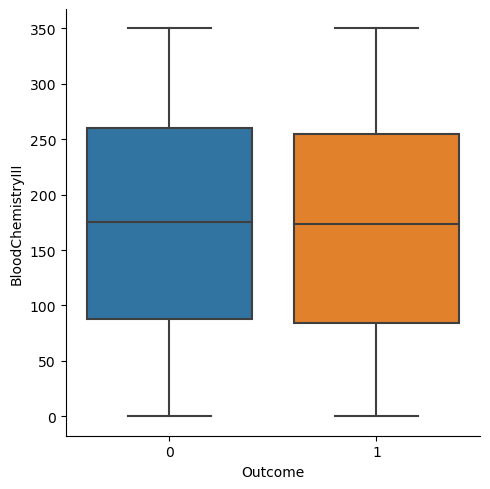

In [41]:
sns.catplot(x = 'Outcome', y = 'BloodChemistryIII', kind = 'box', data = df)

As we saw earlier on correlation matrix there is no diffrence in BloodChemistryIII value for sick
and healthy people. So for reducing the complexity of our model we can not use that column.

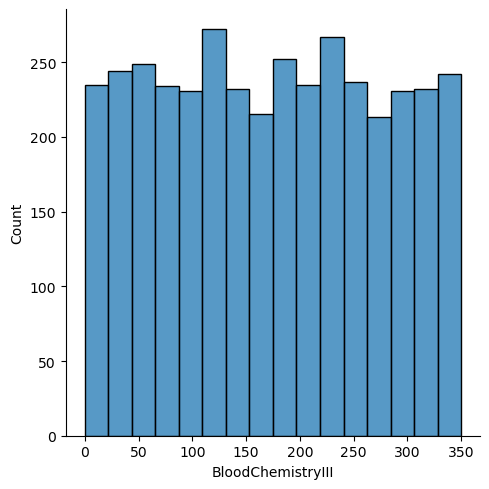

In [42]:
sns.displot(df['BloodChemistryIII'])

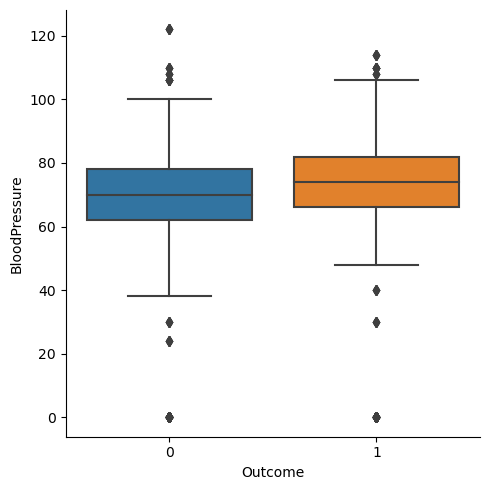

In [43]:
sns.catplot(x = 'Outcome', y = 'BloodPressure', kind = 'box', data = df)

In [44]:
df[df['BloodPressure'] == 0]

,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,State,Outcome
40,0,73.0,0.0,208.0,0.0,0.0,21.1,0.342,25.0,27.0,IA,0
46,2,74.0,0.0,76.0,0.0,0.0,0.0,0.102,22.0,8.0,CO,0
80,3,80.0,0.0,311.0,0.0,0.0,0.0,0.174,22.0,2.0,FL,0
118,2,84.0,0.0,193.0,0.0,0.0,0.0,0.304,21.0,46.0,CA,0
160,2,87.0,0.0,302.0,0.0,23.0,28.9,0.773,25.0,25.0,LA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7434,0,145.0,0.0,110.0,0.0,0.0,44.2,0.630,31.0,76.0,TX,1
7444,2,146.0,0.0,271.0,0.0,0.0,27.5,0.240,28.0,38.0,NY,1
7542,0,167.0,0.0,203.0,0.0,0.0,32.3,0.839,30.0,19.0,PA,1
7606,1,180.0,0.0,350.0,0.0,0.0,43.3,0.282,41.0,49.0,MO,1


As we can see on graph and printed dataframe there is BloodPressure is equal 0 and this cannot be right. We have 175 rows which meet this condition where 'BloodPressure' = 0 so it would be better not delete them. I think better way is to change 0 value with median value of BloodPressure column. Median shoud be better than mean because it is less sensitive on outliers.

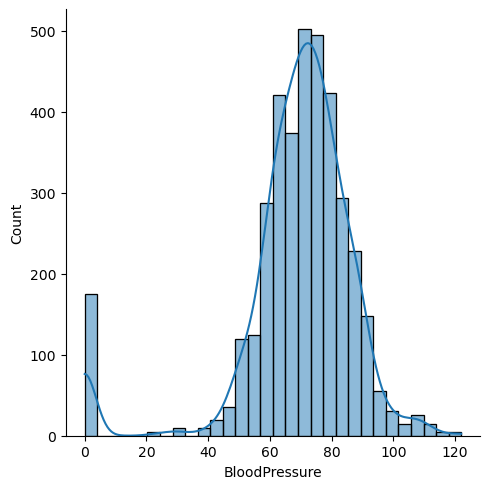

In [45]:
sns.displot(df['BloodPressure'], kde = True, bins = 30)

On this graph, we see distibiution of BloodPressure and if we don't include zeros we can see that it is
similar to normal distribiution.

In [46]:
percent_of_zeros = round(len(df[df['BloodPressure'] == 0])/len(df) * 100, 2)
print(f'Percent of zeros in BloodPressure column: {percent_of_zeros}%')

Percent of zeros in BloodPressure column: 4.58%


In [47]:
df['BloodPressure'][df['BloodPressure'] == 0] = df['BloodPressure'].median()

C:\Users\otbgo\AppData\Local\Temp\ipykernel_24336\876088435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BloodPressure'][df['BloodPressure'] == 0] = df['BloodPressure'].median()


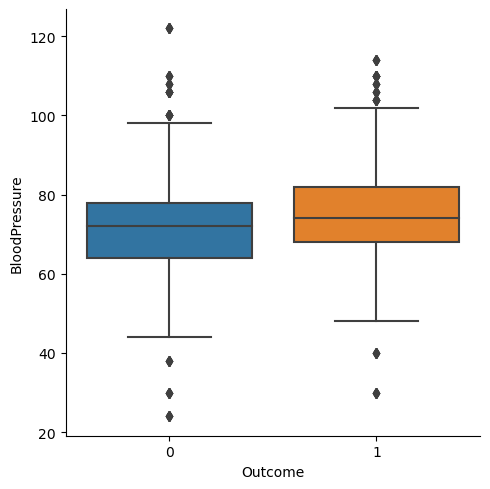

In [48]:
sns.catplot(x = 'Outcome', y = 'BloodPressure', kind = 'box', data = df)

There is no big correlation between BloodPressure and outcome but we can notice that high blood pressure is not healthy.

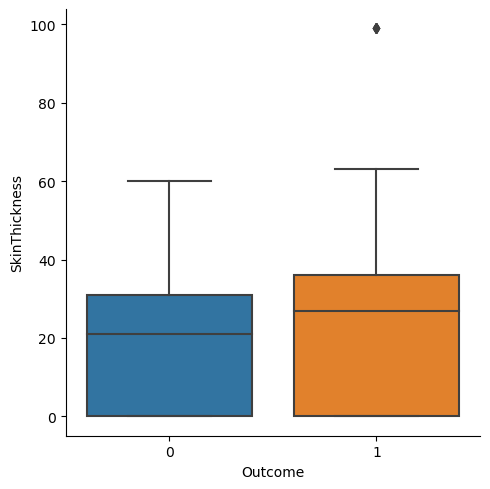

In [49]:
sns.catplot(x = 'Outcome', y = 'SkinThickness', kind = 'box', data = df)

In [50]:
len(df[df['SkinThickness'] == 0])

1129

SkinThikness column also has a lot of zeros and it also cannot be right value. So we can do as we did before and change the zero values with median value.

In [51]:
percent_of_zeros = round(len(df[df['SkinThickness'] == 0])/len(df) * 100, 2)
print(f'Percent of zeros in SkinThickness column: {percent_of_zeros}%')

Percent of zeros in SkinThickness column: 29.55%


In [52]:
df['SkinThickness'][df['SkinThickness'] == 0] = df['SkinThickness'].median()

C:\Users\otbgo\AppData\Local\Temp\ipykernel_24336\1685535171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'][df['SkinThickness'] == 0] = df['SkinThickness'].median()


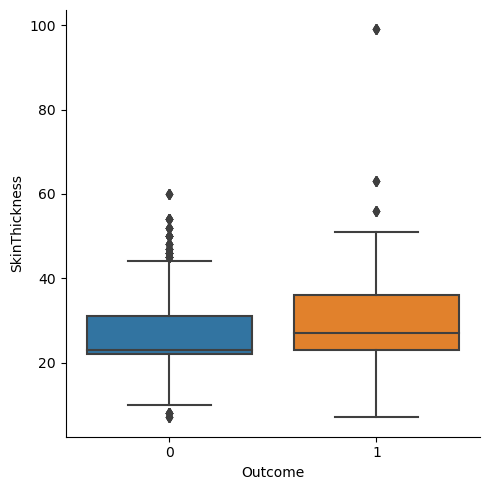

In [53]:
sns.catplot(x = 'Outcome', y = 'SkinThickness', kind = 'box', data = df)

After changing the value we can see any correlations but I'm not sure about correctness of this values.

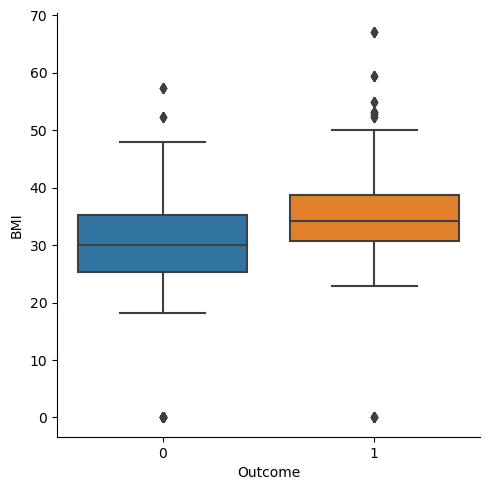

In [54]:
sns.catplot(x = 'Outcome', y = 'BMI', kind = 'box', data = df)

In [55]:
df['BMI'].describe()

count    3821.000000
mean       31.985135
std         7.886638
min         0.000000
25%        27.300000
50%        32.000000
75%        36.600000
max        67.100000
Name: BMI, dtype: float64

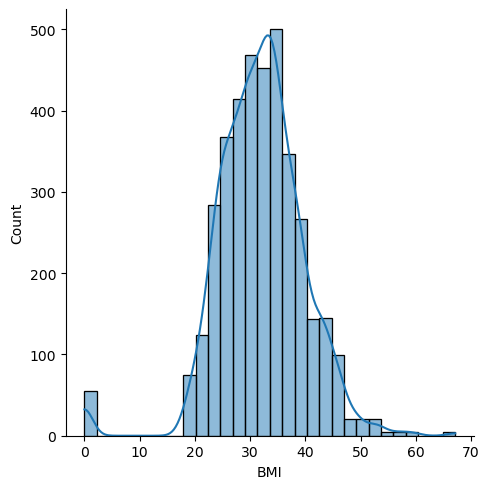

In [56]:
sns.displot(df['BMI'], kde = True, bins = 30)

On this graph we see distibiution of BMI and if we don't include zeros we can see that it is
similar to normal distribiution.

In [57]:
len(df[df['BMI'] == 0])

55

In [58]:
percent_of_zeros = round(len(df[df['BMI'] == 0])/len(df) * 100, 2)
print(f'Percent of zeros in BMI column: {percent_of_zeros}%')

Percent of zeros in BMI column: 1.44%


In [59]:
df['BMI'][df['BMI'] == 0] = df['BMI'].median()

C:\Users\otbgo\AppData\Local\Temp\ipykernel_24336\211417567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'][df['BMI'] == 0] = df['BMI'].median()


In [60]:
len(df[df['BMI'] > 50])

40

In [61]:
percent_of_to_big = round(len(df[df['BMI'] > 50])/len(df) * 100, 2)
print(f'Percent of zeros in BMI column: {percent_of_to_big}%')

Percent of zeros in BMI column: 1.05%


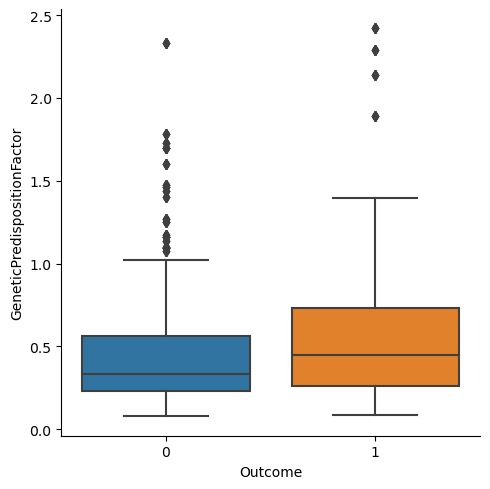

In [62]:
sns.catplot(x = 'Outcome', y = 'GeneticPredispositionFactor', kind = 'box', data = df)

In [63]:
df['GeneticPredispositionFactor'].describe()

count    3821.000000
mean        0.472395
std         0.331595
min         0.078000
25%         0.244000
50%         0.374000
75%         0.627000
max         2.420000
Name: GeneticPredispositionFactor, dtype: float64

On this graph we see the correlation between GeneticPredispositionFactor column and outcome.  The correlation is not that big as we expected. However it's not surprise that if value is bigger than likehood of sicknes is greater.

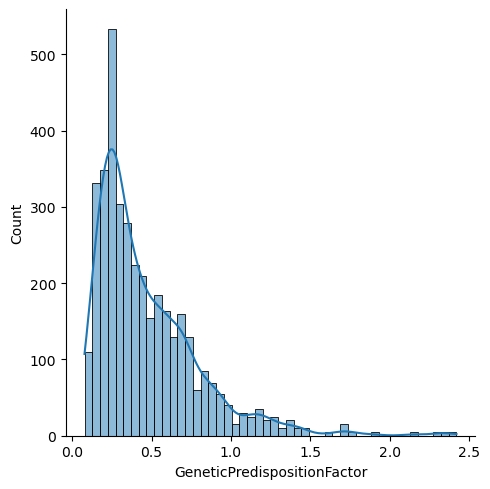

In [64]:
sns.displot(df['GeneticPredispositionFactor'], kde = True)

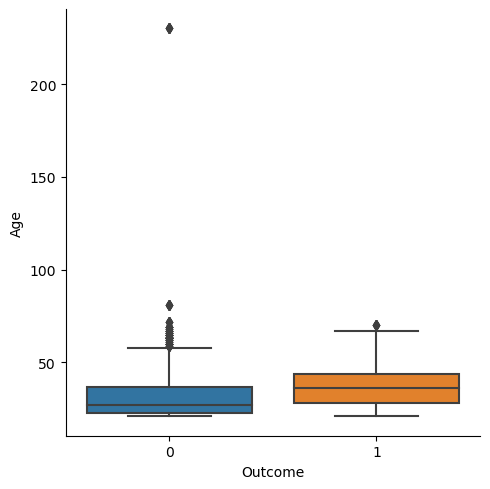

In [65]:
sns.catplot(x = 'Outcome', y = 'Age', kind = 'box', data = df)

In [66]:
df['Age'].describe()

count    3821.000000
mean       33.521329
std        13.737760
min        21.000000
25%        24.000000
50%        29.000000
75%        41.000000
max       230.000000
Name: Age, dtype: float64

On this graph, we can see really unusual values and due to simple statistics we known that in this
dataframe are some people with age 230 years which cannot be real. Let's see how many these values we have.

In [67]:
df[df['Age'] > 100]

,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,State,Outcome
318,1,97.0,82.0,262.0,64.0,19.0,18.2,0.299,230.0,58.0,WI,0
1854,1,97.0,82.0,158.0,64.0,19.0,18.2,0.299,230.0,58.0,WI,0
3390,1,97.0,82.0,55.0,64.0,19.0,18.2,0.299,230.0,58.0,WI,0
4926,1,97.0,82.0,205.0,64.0,19.0,18.2,0.299,230.0,58.0,WI,0
6462,1,97.0,82.0,307.0,64.0,19.0,18.2,0.299,230.0,58.0,WI,0


So there is only 5 rows with age = 230  for these we can delete them because 5 rows does not effect.

In [68]:
df = df[df['Age'] < 100]

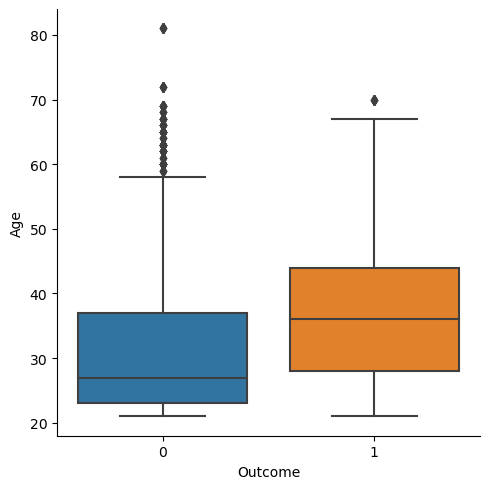

In [69]:
sns.catplot(x = 'Outcome', y = 'Age', kind = 'box', data = df)

In [70]:
df['Age'].describe()

count    3816.000000
mean       33.263889
std        11.760623
min        21.000000
25%        24.000000
50%        29.000000
75%        41.000000
max        81.000000
Name: Age, dtype: float64

Now we see that it looks quite normal and there is correlation between age and outcome. It's look normal as older people are sick more often.

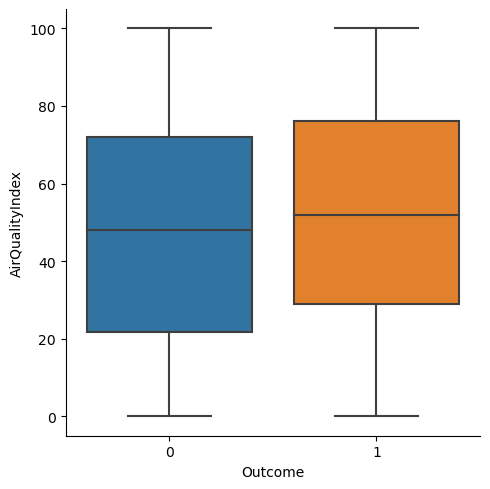

In [71]:
sns.catplot(x = 'Outcome', y = 'AirQualityIndex', kind = 'box', data = df)

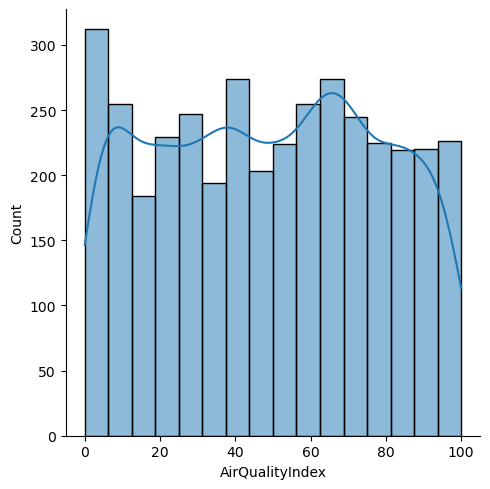

In [72]:
sns.displot(df['AirQualityIndex'], kde = True)

As we saw before in correlation matrix there is no big correlation between AirQualityIndex value and outcome. So this feature can be useless.

In [73]:
df['State'].unique()

array(['CA', 'OR', 'CT', 'UT', 'WV', 'TN', 'VA', 'FL', 'KY', 'WI', 'AR',
       'MA', 'PA', 'AZ', 'IA', 'MO', 'CO', 'GA', 'SC', 'OH', 'MD', 'IL',
       'OK', 'NY', 'LA', 'NC', 'MN', 'NE', 'NJ', 'MS', 'IN', 'KS', 'DE',
       'MT', 'AL', 'MI', 'NV', 'WA', 'SD', 'ME', 'ID', 'HI', 'TX', 'NH',
       'RI', 'NM', 'ND', 'VT', 'KU'], dtype=object)

In [74]:
len(df['State'].unique())

49

State column is the only categorical column in our dataframe and we have 49 of them, so quite a lot. We 
have to remember about using OneHotEncoder when we will use that column in our model.

<AxesSubplot: xlabel='State', ylabel='AirQualityIndex'>

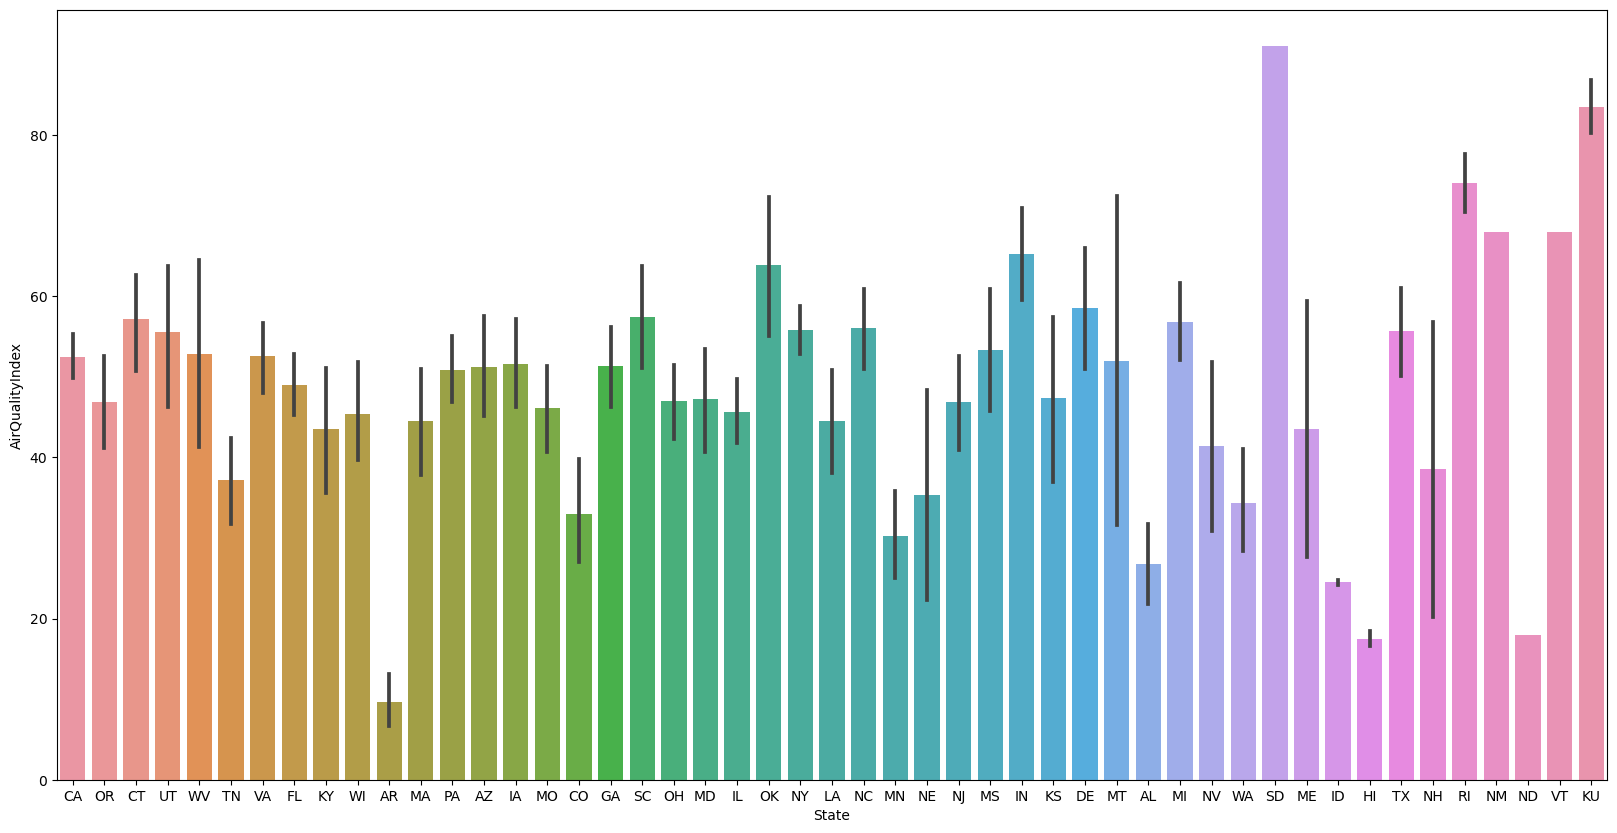

In [75]:
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(x = 'State', y = 'AirQualityIndex', data = df, ax = ax)

This graph shows AirQualityIndex for each state

In this section we start build our model, so firstly import needed classes and functions, split dataframes on independent columns - X and goal column - y

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [77]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [78]:
df.head()

,Pregnancies,BloodChemistryI,BloodChemistryII,BloodChemistryIII,BloodPressure,SkinThickness,BMI,GeneticPredispositionFactor,Age,AirQualityIndex,State,Outcome
0,1,0.0,23.0,10.0,74.0,20.0,27.7,0.299,21.0,38.0,CA,0
2,1,0.0,0.0,61.0,68.0,35.0,32.0,0.389,22.0,10.0,CA,0
4,1,0.0,0.0,172.0,48.0,20.0,24.7,0.140,22.0,77.0,CA,0
6,5,44.0,0.0,207.0,62.0,23.0,25.0,0.587,36.0,40.0,OR,0
8,2,56.0,45.0,150.0,56.0,28.0,24.2,0.332,22.0,70.0,CT,0


Let's do list of columns and divide them in diffrent categories which will make coding easier.

In [79]:
numeric_columns = ['Pregnancies', 'BloodChemistryI', 'BloodPressure', 'SkinThickness', 'BMI', 
                   'GeneticPredispositionFactor', 'Age', 'AirQualityIndex']
categorical_columns = ['State']
correlated_columns = ['Pregnancies', 'BloodChemistryI', 'BMI','GeneticPredispositionFactor', 'Age']
without_SkinThikness_column = ['Pregnancies', 'BloodChemistryI', 'BloodPressure', 'BMI', 
                         'GeneticPredispositionFactor', 'Age', 'AirQualityIndex']

Now we split our dataframes on train and test set (remember that this dataset is unbalance) it has to
be done, because we have to check models, compare them and choose the best model. We want to have the same proportions sick/healthy in train and test set.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

Import functions calculating accuracy, precision and recall

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

We can do random array to see what accuracy, precision and recall we can get by guessing outcome.
Of course we want our model to be better than this.

In [82]:
random = np.array(np.random.randint(0, 2, len(y_test)))

Let's import metrics to check the score of our model. We can apply three metrics, but due to our dataframe being imbalanced, the most useful metric will be recall.

In [83]:
accuracy = accuracy_score(y_test, random)
precision = precision_score(y_test, random)
recall = recall_score(y_test, random)

In [84]:
print(f'metrics for radnom prediction: accuracy {accuracy}, precision {precision}, recall {recall}')

metrics for radnom prediction: accuracy 0.5222513089005235, precision 0.3689839572192513, recall 0.5168539325842697


Now we will do pipelines and column transformers to automize and to make work easier. SimpleImputer
class will impute median value for every NaN, and StandardScaller will standardize features what 
helps model, finally OneHotEncoder will allows the computer to understand categorical data. We don't know what transformation will be the best, so we can code a few and then choose the best one.

In [85]:
stand_prep = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
cat_prep = make_pipeline(OneHotEncoder(handle_unknown = 'ignore'))

In [86]:
ct1 = make_column_transformer((stand_prep, numeric_columns), remainder = 'drop')
ct2 = make_column_transformer((stand_prep, numeric_columns), 
                              (cat_prep, categorical_columns),
                              remainder = 'drop')
ct3 = make_column_transformer((stand_prep, correlated_columns), remainder = 'drop')
ct4 = make_column_transformer((stand_prep, correlated_columns), 
                              (cat_prep, categorical_columns),
                              remainder = 'drop')

ct5 = make_column_transformer((stand_prep, without_SkinThikness_column), remainder = 'drop')
ct6 = make_column_transformer((stand_prep, without_SkinThikness_column), 
                              (cat_prep, categorical_columns),
                              remainder = 'drop')

Import machine learning algoritms

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

And write final pipelines

In [88]:
pipelines = {
#     'rfc_ct1': make_pipeline(ct1, RandomForestClassifier()),
#     'rfc_ct2': make_pipeline(ct2, RandomForestClassifier()),
#     'rfc_ct3': make_pipeline(ct3, RandomForestClassifier()),
#     'rfc_ct4': make_pipeline(ct4, RandomForestClassifier()),
    'rfc_ct5': make_pipeline(ct5, RandomForestClassifier()),
#     'rfc_ct6': make_pipeline(ct6, RandomForestClassifier()),
#     'svc_ct1': make_pipeline(ct1, SVC()),
#     'svc_ct2': make_pipeline(ct2, SVC()),
#     'svc_ct3': make_pipeline(ct3, SVC()),
#     'svc_ct4': make_pipeline(ct4, SVC()),
#     'svc_ct5': make_pipeline(ct5, SVC()),
#     'svc_ct6': make_pipeline(ct6, SVC()),
}

RandomizedSearchCV will help with choose the best params for model

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
from scipy.stats import randint, uniform

In [91]:
params = {
    'rfc': {
        'randomforestclassifier__n_estimators': [500, 1000, 2000],
        'randomforestclassifier__max_depth': [3, 5, 7],
        'randomforestclassifier__min_samples_split': [2, 5, 10],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4],
        'randomforestclassifier__bootstrap': [True, False]
     },
    'svc': {
        'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'svc__C': np.logspace(-3, 3, 7),
        'svc__gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
    }
}

In [92]:
fit_models = {}

Finally we can train models

In [93]:
for algo, pipeline in pipelines.items():
    model = RandomizedSearchCV(pipeline, params[algo[:3]], n_iter=10, cv=5, verbose=2, random_state=42,
                                n_jobs=-1)
    model.fit(X_train, y_train)
    fit_models[algo] = model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Print score for each model

In [94]:
for algo, model in fit_models.items():
    score = model.score(X_train, y_train)
    print(algo, score)

rfc_ct5 0.9479030144167759


Calculate accuracy, precision an recall and best params of the model

In [95]:
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'Best params for {algo}: {model.best_params_}')
    print(f'metrics for {algo} accuracy {accuracy}, precision {precision}, recall {recall}')

Best params for rfc_ct5: {'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 7, 'randomforestclassifier__bootstrap': True}
metrics for rfc_ct5 accuracy 0.9293193717277487, precision 0.9531914893617022, recall 0.8389513108614233


Choose model based on scores and make the predictions. I've choosen Random Forest Classifier model with 'ct5' column transformer because it's one of the best and has not that many features for example SkinnThikness what I wasn't sure about the values.

In [96]:
best_model = fit_models['rfc_ct5']

In [97]:
y_pred = best_model.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix

In [99]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

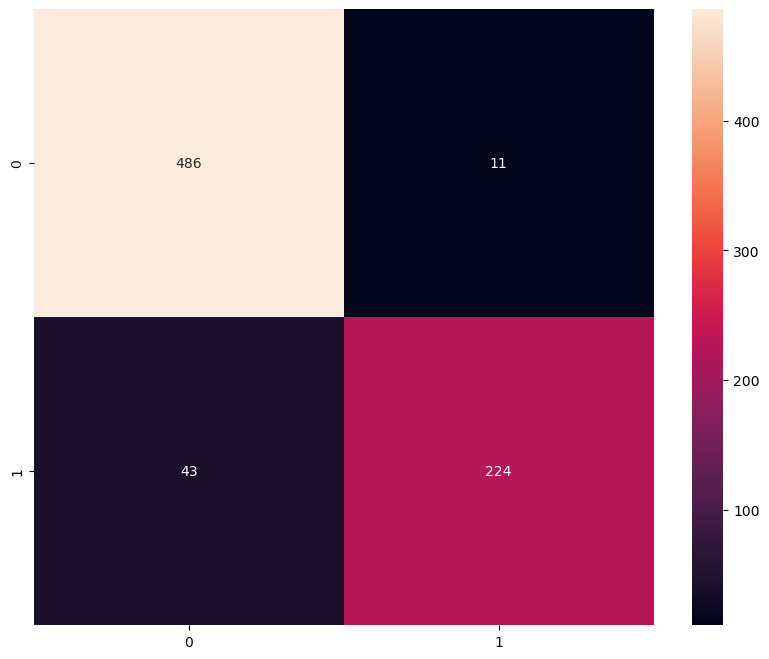

In [100]:
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(cm, annot = True, fmt='d')

From confusion matrics we know the choices made by our model: <br>
predicted 0 and that was right: 484 times <br>
predicted 0 and that was false: 33 times <br>
predicted 1 and that was right: 235 times <br>
predicted 1 and that was false: 15 times

Now we can check what was the importances of features

In [101]:
feature_importances = best_model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

In [102]:
importance = list(map(lambda x, y: [f'{str(round(x*100, 2))}%', y], feature_importances, without_SkinThikness_column))

In [103]:
importance

[['7.75%', 'Pregnancies'],
 ['35.4%', 'BloodChemistryI'],
 ['5.63%', 'BloodPressure'],
 ['18.73%', 'BMI'],
 ['10.66%', 'GeneticPredispositionFactor'],
 ['14.43%', 'Age'],
 ['7.39%', 'AirQualityIndex']]

And plot feature_importances to see it better

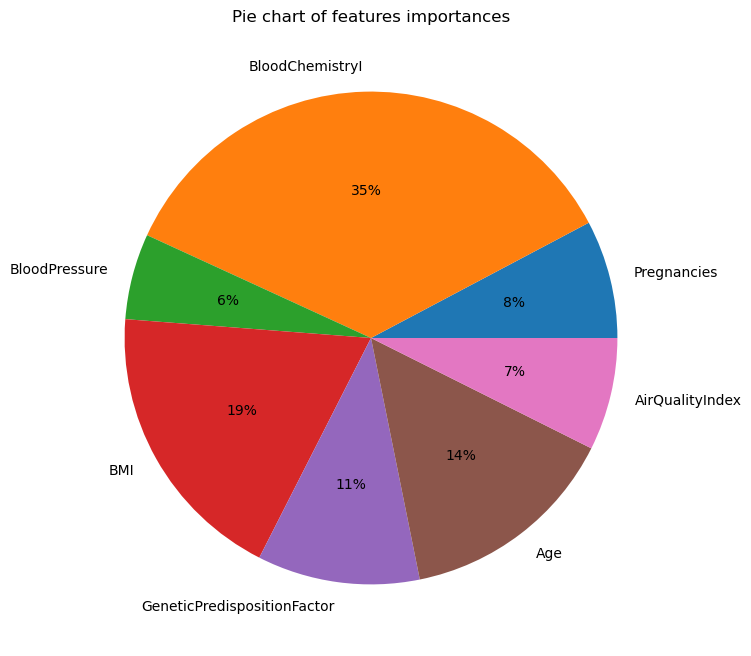

In [105]:
f, ax = plt.subplots(figsize = (8,8))
plt.pie(x = feature_importances*100, labels = without_SkinThikness_column, autopct='%.0f%%')
plt.title('Pie chart of features importances')
plt.show()

So now we can do final conclusion: the most important feature is BloodChemistryI and we saw that 75% of sick patients have 125 or higher. BMI is second important feature, as we can observe, people who have higher BMI than 30 have higher probablity of getting sick. Only 25% of healthy people are older than  37 years old and 50% of sick are older than 36 years. Based on age, we can also predict outcome. As we can  guess if GeneticPredispositionFactor is higher than likelihood of sickness is bigger but again this is no that importance feature as we can assume. We don't have a lot of sick people with more than 5 pregnancies but  50% of them had 4 preganancies or more. There is no big dependence between AirQualityIndex and outcome but if someone live in a place with clean Air doesn't have to worry that much. In the end BloodPresure feature shows with the higher blood pressure there higher chances getting sick.

In [106]:
def silnia(n):
    silnia = 1
    for i in range(1, n+1):
          silnia = silnia * i
    return silnia

In [107]:
a = silnia(3)

In [108]:
print(a)

6
